In [ ]:
import kagglehub
uldisvalainis_audio_emotions_path = kagglehub.dataset_download('uldisvalainis/audio-emotions')

print('Data source import complete.')

100%|██████████| 1.12G/1.12G [00:40<00:00, 29.6MB/s]

Extracting files...


Data source import complete.


In [ ]:
import os
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


dataset_path = uldisvalainis_audio_emotions_path+"/Emotions"

data = []

for emotion in os.listdir(dataset_path):
    emotion_folder = os.path.join(dataset_path, emotion)
    if os.path.isdir(emotion_folder):
        for file in os.listdir(emotion_folder):
            if file.endswith(".wav"):
                file_path = os.path.join(emotion_folder, file)
                try:
                    y, sr = librosa.load(file_path, sr=None)
                    duration = librosa.get_duration(y=y, sr=sr)
                    data.append({"Emotion": emotion, "File": file, "Duration": duration})
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

<ipython-input-3-1cc57c32dd76>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Emotion', order=df['Emotion'].value_counts().index, palette="Set2")


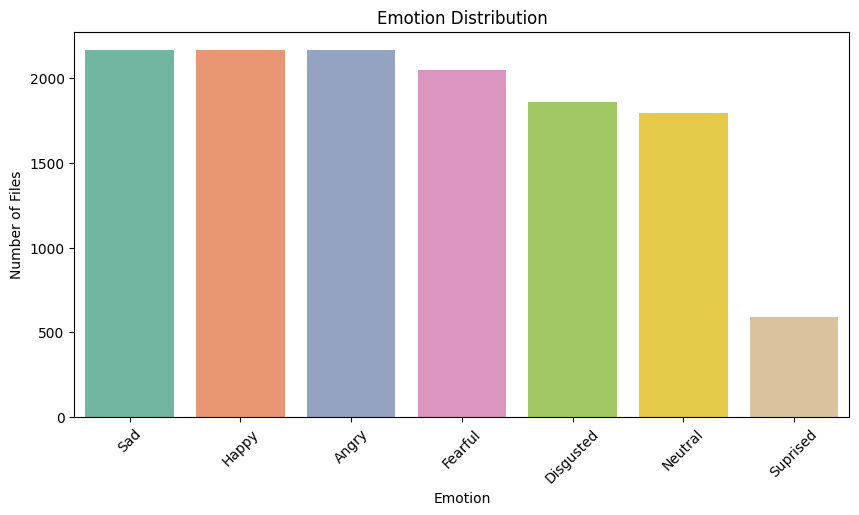

<ipython-input-3-1cc57c32dd76>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Emotion', y='Duration', order=df['Emotion'].value_counts().index, palette="Set3")


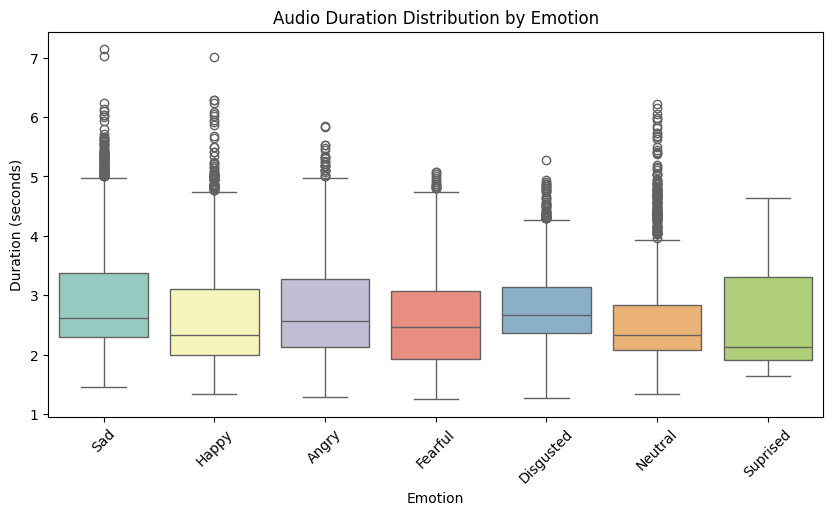

In [ ]:
df = pd.DataFrame(data)


plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Emotion', order=df['Emotion'].value_counts().index, palette="Set2")
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Number of Files")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Emotion', y='Duration', order=df['Emotion'].value_counts().index, palette="Set3")
plt.title("Audio Duration Distribution by Emotion")
plt.xlabel("Emotion")
plt.ylabel("Duration (seconds)")
plt.xticks(rotation=45)
plt.show()

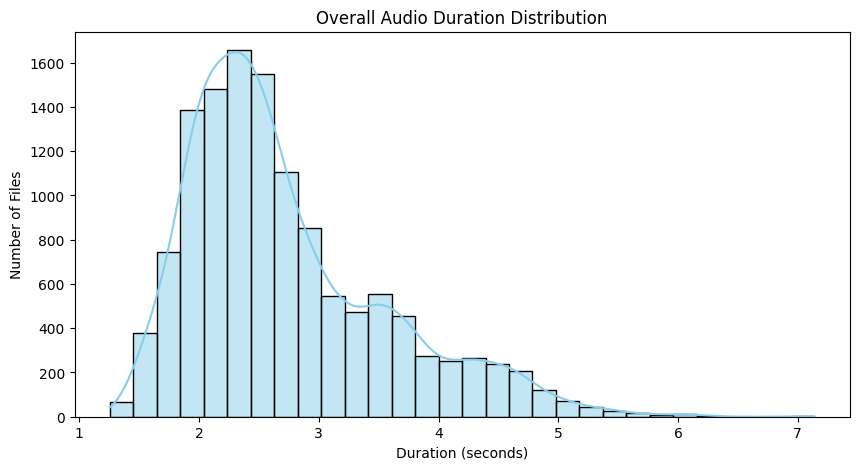

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Duration'], bins=30, kde=True, color='skyblue')
plt.title("Overall Audio Duration Distribution")
plt.xlabel("Duration (seconds)")
plt.ylabel("Number of Files")
plt.show()

In [ ]:
import numpy as np

def plot_waveform_and_spectrogram(file_path):
    y, sr = librosa.load(file_path)
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title("Waveform")

    plt.subplot(1, 2, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Spectrogram")

    plt.tight_layout()
    plt.show()


In [ ]:
import random
def select_random_files_from_emotions(base_path):
    emotion_folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]
    selected_files = {}

    for emotion in emotion_folders:
        emotion_path = os.path.join(base_path, emotion)
        files = [f for f in os.listdir(emotion_path) if f.endswith(".wav")]
        if files:
            selected_file = random.choice(files)
            selected_files[emotion] = os.path.join(emotion_path, selected_file)

    return selected_files


random_files = select_random_files_from_emotions(dataset_path)
print(random_files)

{'Neutral': '/root/.cache/kagglehub/datasets/uldisvalainis/audio-emotions/versions/1/Emotions/Neutral/f06.wav', 'Suprised': '/root/.cache/kagglehub/datasets/uldisvalainis/audio-emotions/versions/1/Emotions/Suprised/03-01-08-01-02-02-18.wav', 'Fearful': '/root/.cache/kagglehub/datasets/uldisvalainis/audio-emotions/versions/1/Emotions/Fearful/1052_TAI_FEA_XX.wav', 'Disgusted': '/root/.cache/kagglehub/datasets/uldisvalainis/audio-emotions/versions/1/Emotions/Disgusted/YAF_lot_disgust.wav', 'Angry': '/root/.cache/kagglehub/datasets/uldisvalainis/audio-emotions/versions/1/Emotions/Angry/1004_TAI_ANG_XX.wav', 'Happy': '/root/.cache/kagglehub/datasets/uldisvalainis/audio-emotions/versions/1/Emotions/Happy/YAF_luck_happy.wav', 'Sad': '/root/.cache/kagglehub/datasets/uldisvalainis/audio-emotions/versions/1/Emotions/Sad/1054_MTI_SAD_XX.wav'}


Emotion: Neutral, File: /root/.cache/kagglehub/datasets/uldisvalainis/audio-emotions/versions/1/Emotions/Neutral/f06.wav


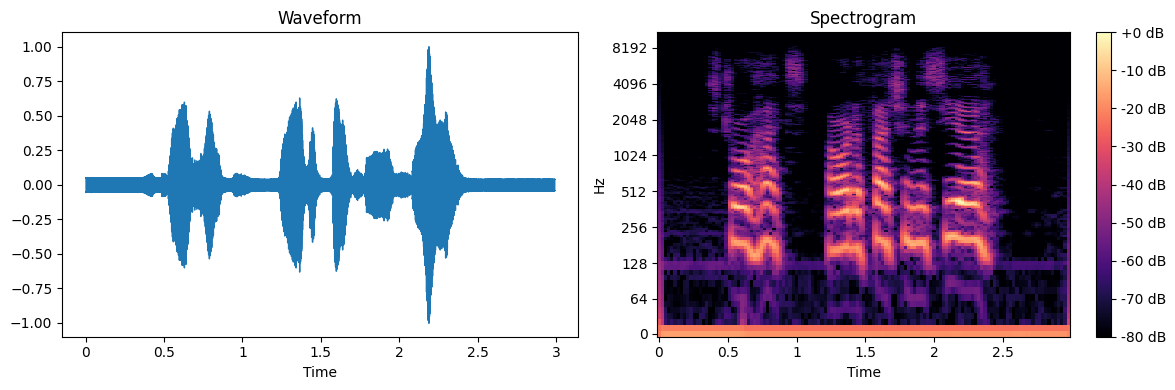

Emotion: Suprised, File: /root/.cache/kagglehub/datasets/uldisvalainis/audio-emotions/versions/1/Emotions/Suprised/03-01-08-01-02-02-18.wav


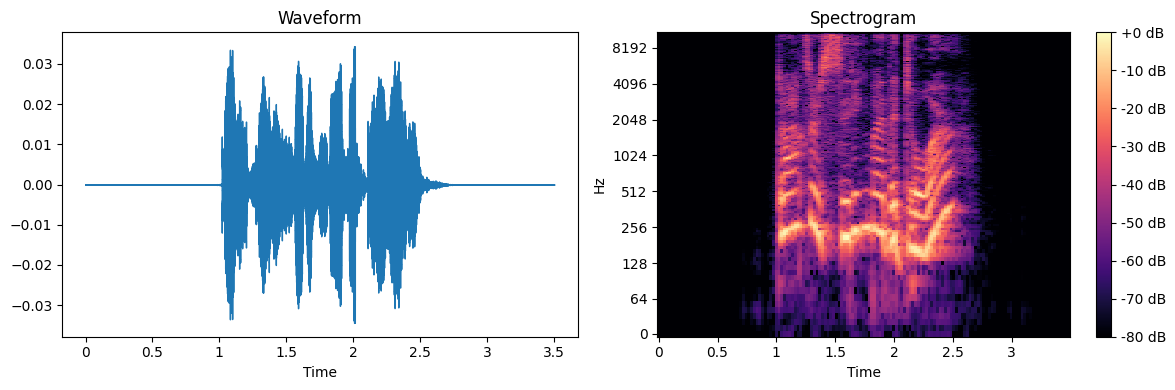

Emotion: Fearful, File: /root/.cache/kagglehub/datasets/uldisvalainis/audio-emotions/versions/1/Emotions/Fearful/1052_TAI_FEA_XX.wav


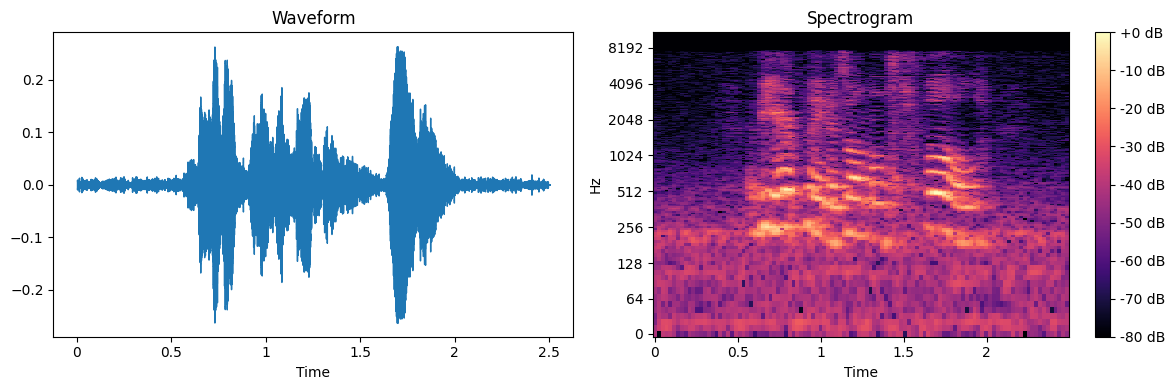

Emotion: Disgusted, File: /root/.cache/kagglehub/datasets/uldisvalainis/audio-emotions/versions/1/Emotions/Disgusted/YAF_lot_disgust.wav


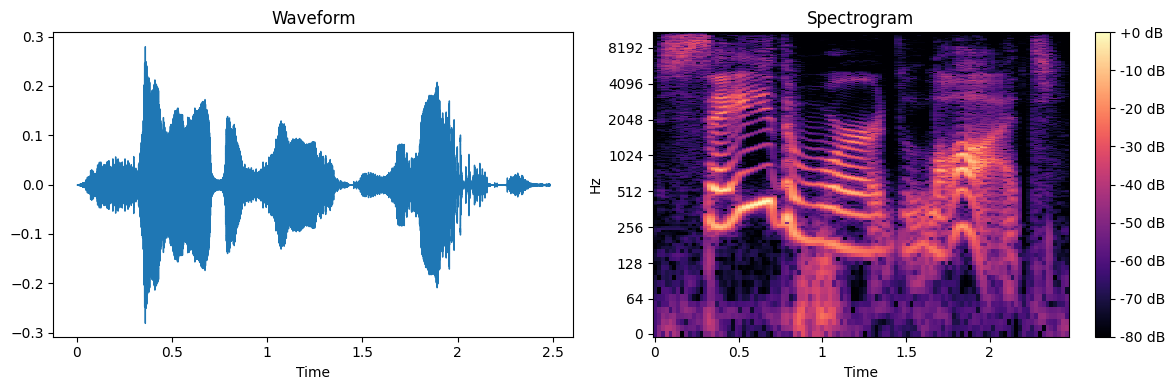

Emotion: Angry, File: /root/.cache/kagglehub/datasets/uldisvalainis/audio-emotions/versions/1/Emotions/Angry/1004_TAI_ANG_XX.wav


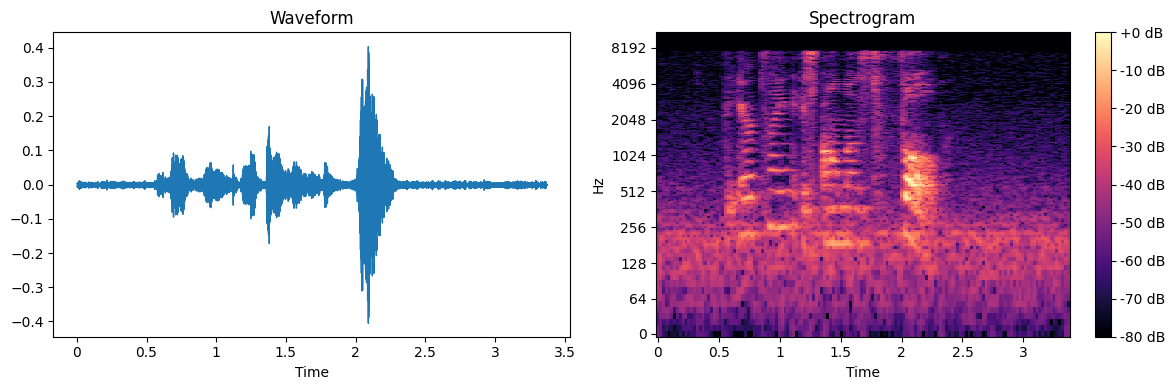

Emotion: Happy, File: /root/.cache/kagglehub/datasets/uldisvalainis/audio-emotions/versions/1/Emotions/Happy/YAF_luck_happy.wav


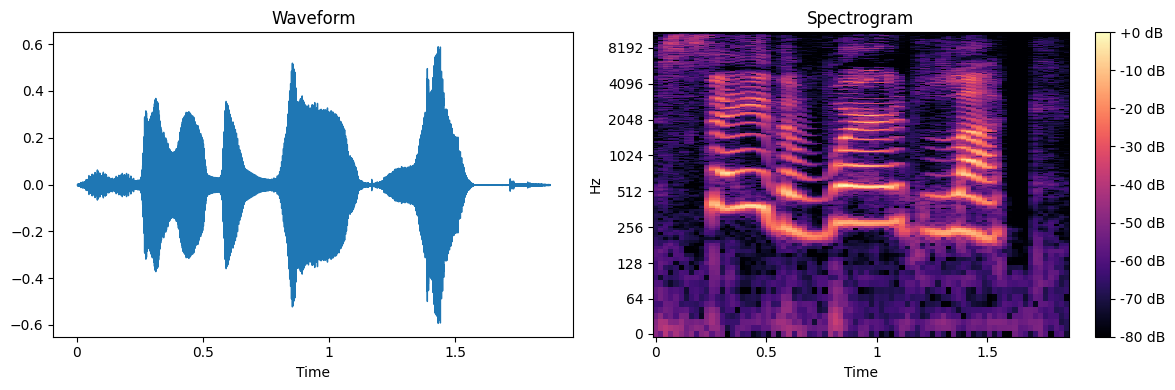

Emotion: Sad, File: /root/.cache/kagglehub/datasets/uldisvalainis/audio-emotions/versions/1/Emotions/Sad/1054_MTI_SAD_XX.wav


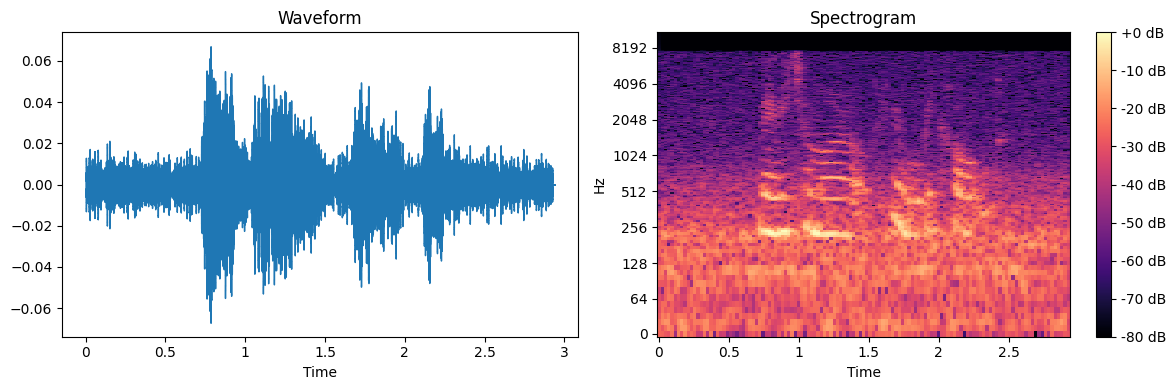

In [ ]:
for emotion in random_files:
    print(f"Emotion: {emotion}, File: {random_files[emotion]}")
    plot_waveform_and_spectrogram(random_files[emotion])

In [ ]:
import librosa
import numpy as np
import pandas as pd

def extract_feature_means(audio_file_path: str) -> pd.DataFrame:

    y, sr = librosa.load(audio_file_path)


    signal, _ = librosa.effects.trim(y)

    # Extract Zero Crossing Rate (ZCR)
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(signal)[0])

    # **Energy**: Total energy of the signal
    energy = np.sum(signal**2) / len(signal)

    # **Entropy of Energy**: Calculate entropy of the energy distribution
    energy_envelope = np.abs(signal)
    energy_log = np.log(energy_envelope + 1e-10)  # Avoid log(0)
    entropy_of_energy = -np.sum(energy_log * energy_envelope) / np.sum(energy_envelope)

    # **Spectrogram** in previous implementation
    d_audio = np.abs(librosa.stft(signal))
    db_audio = librosa.amplitude_to_db(d_audio, ref=np.max)
    spectrogram = np.mean(db_audio[0])

    # **Mel Spectrogram**
    mel_spectrogram = np.mean(librosa.amplitude_to_db(librosa.feature.melspectrogram(y=signal, sr=sr), ref=np.max)[0])

    # **Harmonics and Perceptual Shock Wave**
    y_harm, y_perc = librosa.effects.hpss(signal)
    harmonics = np.mean(y_harm)
    perceptual_shock_wave = np.mean(y_perc)

    # **Spectral Centroids**
    spectral_centroids = librosa.feature.spectral_centroid(y=signal, sr=sr)[0]
    spectral_centroids_mean = np.mean(spectral_centroids)
    spectral_centroids_delta = np.mean(librosa.feature.delta(spectral_centroids))
    spectral_centroids_accelerate = np.mean(librosa.feature.delta(spectral_centroids, order=2))

    # **Chroma Frequencies**
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sr)
    chroma_means = [np.mean(chromagram[i]) for i in range(12)]

    # **Tempo (BPM - Beats Per Minute)**
    tempo_y, _ = librosa.beat.beat_track(y=signal, sr=sr)
    tempo_bpm = tempo_y
    print(tempo_bpm)

    # **Spectral Roll-off**
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=signal, sr=sr)[0])

    # **Spectral Flux**
    onset_env = librosa.onset.onset_strength(y=signal, sr=sr)
    spectral_flux = np.mean(onset_env)

    # **Spectral Bandwidth**
    spectral_bandwidth_2 = np.mean(librosa.feature.spectral_bandwidth(y=signal, sr=sr)[0])
    spectral_bandwidth_3 = np.mean(librosa.feature.spectral_bandwidth(y=signal, sr=sr, p=3)[0])
    spectral_bandwidth_4 = np.mean(librosa.feature.spectral_bandwidth(y=signal, sr=sr, p=4)[0])


    # **MFCCs (Mel Frequency Cepstral Coefficients)**
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
    delta = librosa.feature.delta(mfcc)
    accelerate = librosa.feature.delta(mfcc, order=2)
    mfcc_features = {}
    for i in range(13):
        mfcc_features[f"mfcc{i}"] = np.mean(mfcc[i])
        mfcc_features[f"mfcc_delta_{i}"] = np.mean(delta[i])
        mfcc_features[f"mfcc_accelerate_{i}"] = np.mean(accelerate[i])

    # Combine all features into a single DataFrame
    features = {
        'file_name': audio_file_path,
        'zero_crossing_rate': zero_crossing_rate,
        'energy': energy,
        'entropy_of_energy': entropy_of_energy,
        'spectrogram': spectrogram,
        'mel_spectrogram': mel_spectrogram,
        'harmonics': harmonics,
        'perceptual_shock_wave': perceptual_shock_wave,
        'spectral_centroids': spectral_centroids_mean,
        'spectral_centroids_delta': spectral_centroids_delta,
        'spectral_centroids_accelerate': spectral_centroids_accelerate,
        'tempo_bpm': float(tempo_bpm),
        'spectral_rolloff': spectral_rolloff,
        'spectral_flux': spectral_flux,
        'spectral_bandwidth_2': spectral_bandwidth_2,
        'spectral_bandwidth_3': spectral_bandwidth_3,
        'spectral_bandwidth_4': spectral_bandwidth_4,
    }

    features.update(mfcc_features)
    for i in range(12):
      features[f'chroma{i+1}'] = chroma_means[i]
    return pd.DataFrame([features])


In [ ]:
extract_feature_means('/root/.cache/kagglehub/datasets/uldisvalainis/audio-emotions/versions/1/Emotions/Disgusted/YAF_pain_disgust.wav')

[107.66601562]


<ipython-input-8-d707ceac17a2>:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'tempo_bpm': float(tempo_bpm),


,file_name,zero_crossing_rate,energy,entropy_of_energy,spectrogram,mel_spectrogram,harmonics,perceptual_shock_wave,spectral_centroids,spectral_centroids_delta,...,chroma3,chroma4,chroma5,chroma6,chroma7,chroma8,chroma9,chroma10,chroma11,chroma12
0,/root/.cache/kagglehub/datasets/uldisvalainis/...,0.155579,0.00052,3.65834,-54.010113,-74.53656,-0.000007,-0.000003,2663.776393,-24.47113,...,0.316052,0.351773,0.359879,0.366033,0.377987,0.396244,0.465555,0.427983,0.336104,0.346492


In [ ]:
import os
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress bar

dataset_path = uldisvalainis_audio_emotions_path+"/Emotions"
emotion_folders = ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised']

# Initialize an empty DataFrame to store all extracted features
all_features = pd.DataFrame()

# Create a list of all audio files in the dataset
audio_files = []
for emotion in emotion_folders:
    emotion_folder_path = os.path.join(dataset_path, emotion)
    for audio_file in os.listdir(emotion_folder_path):
        if audio_file.endswith(".wav"):  # Assuming audio files are .wav format
            audio_files.append(os.path.join(emotion_folder_path, audio_file))

# Loop through all audio files with a progress bar
for audio_file_path in tqdm(audio_files, desc="Extracting Features", unit="file"):
    # Extract features from the audio file
    features_df = extract_feature_means(audio_file_path)  # Assuming this function is already defined

    # Extract the emotion label from the folder path
    emotion = audio_file_path.split(os.sep)[-2]  # Getting emotion from the folder name

    # Add emotion label to the features DataFrame
    features_df['Emotion'] = emotion

    # Append the extracted features to the main DataFrame
    all_features = pd.concat([all_features, features_df], ignore_index=True)



In [ ]:
all_features['tempo_bpm'] = all_features['tempo_bpm'].apply(lambda x: float(x[0]) if isinstance(x, (list, np.ndarray)) else float(x))

In [ ]:
output_csv_path = "/content/sample_data/emotion_audio.csv"
all_features.to_csv(output_csv_path, index=False)

print(f"CSV file saved at {output_csv_path}")

In [ ]:
df=pd.read_csv(output_csv_path)

In [ ]:
df.info()